In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ds = pd.read_csv('resume_list_ds.csv_')

In [4]:
df_ds.head()

,job_title,resume
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...


In [5]:
df_ds["Category"] = "Data Scientist"
df_ds.to_csv("resume_list_ds.csv", index=False)

In [6]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  100 non-null    object
 1   resume     100 non-null    object
 2   Category   100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [7]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df_ds['job_title'].unique())

Displaying the distinct categories of resume:

 
['SENIOR DATA SCIENTIST' 'Data Scientist' 'Senior Data Scientist'
 'Analytics Consultant Data Scientist' 'Data Scientist Analyst'
 'Property Preservation Data Scientist' 'ML Engineer & Data Scientist'
 'Ezan Marlon Kodjo -ML Engineer & Data Scientist'
 'Data Scientist, Operations/Marketing Lead'
 'Accounting Administrator Data Scientist'
 'Data Scientist Committee Member' 'Data Analyst Research Scientist'
 'Data Analyst Scientist' 'Data Scientist Polytechnic'
 'Tapiwa Chadenga - Data Scientist'
 'Data Scientist Machine Learning engineer' 'Data Scientist Cobol'
 'Data scientist, Machine learning engineer, Applied Mathematics'
 'Data Scientist Berkeley' 'Prophet Data Scientist'
 'Research Scientist Data' 'Science Intern Data Scientist'
 'Data Scientist Or Coding'
 'Data Scientist, Data Analyst. SQL, R, Python, Power BI'
 'Machine Learning Engineer - Data Scientist'
 'Mustafa Alam - DATA SCIENTIST' 'Intelligence Analyst Data Scientist'
 'Ma

In [8]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_ds['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Data Scientist                                                         38
Data Analyst Scientist                                                  5
Senior Data Scientist                                                   3
Data scientist                                                          2
Data Scientist/Analyst                                                  2
Tapiwa Chadenga - Data Scientist                                        1
Data Scientist Prophet                                                  1
Research Scientist Data                                                 1
Data Scientist Translator                                               1
Data Analyst Research Scientist                                         1
Data scientist, Machine learning engineer, Applied Mathematics          1
Data Analyst/ Data Scientist                                            1
Data Scient

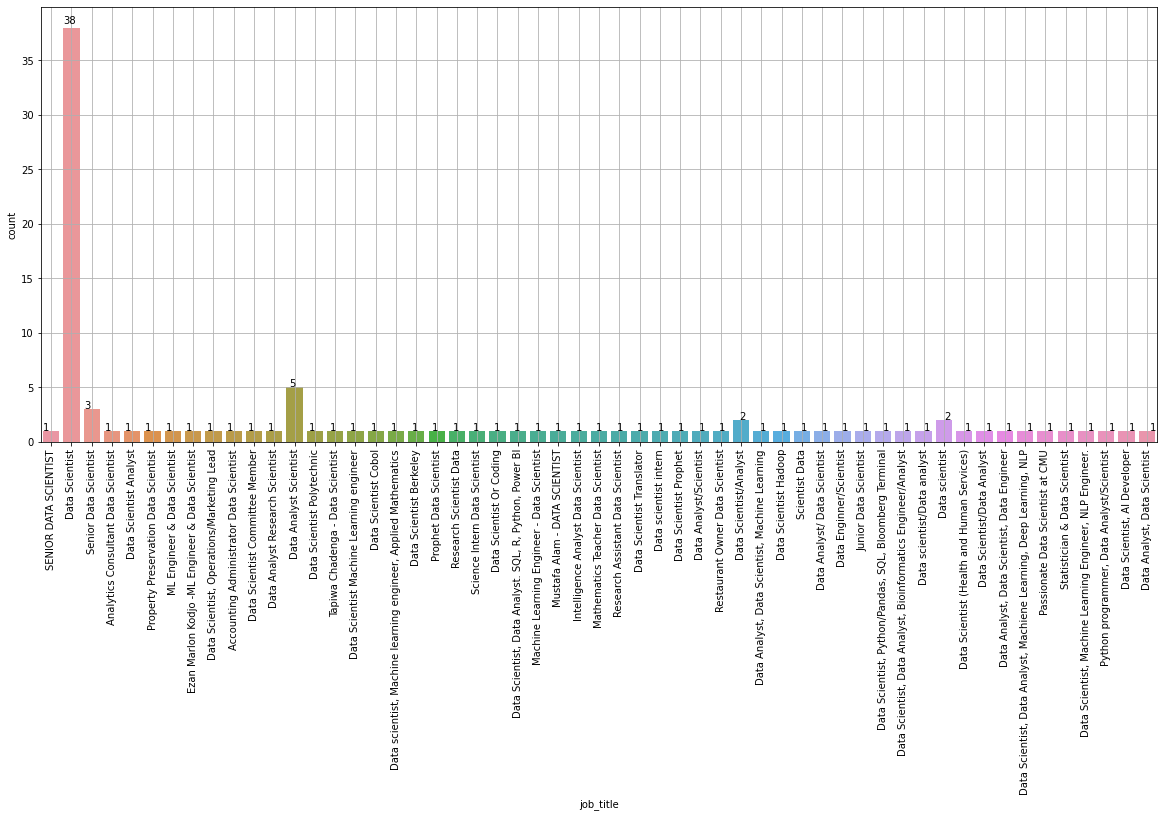

In [9]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="job_title", data=df_ds)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [10]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_ds['cleaned_resume'] = df_ds.resume.apply(lambda x: cleanResume(x))

In [11]:
df_ds.head()

,job_title,resume,Category,cleaned_resume
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...


In [12]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [13]:
df_ds['tokenized'] = df_ds['cleaned_resume'].apply(word_tokenize)
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year..."


In [14]:
df_ds['lowercase'] = df_ds['tokenized'].apply(lambda x: [word.lower() for word in x])
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year..."


In [15]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [16]:
stop_words = set(stopwords.words('english'))
df_ds['stopwords_removed'] = df_ds['lowercase'].apply(lambda x: [word for word in x if word not in stop_words])
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp..."


In [17]:
df_ds['pos_tags'] = df_ds['stopwords_removed'].apply(nltk.tag.pos_tag)
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g...","[(loay, JJ), (khalifa, NN), (data, NNS), (scie..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c...","[(summary, JJ), (years, NNS), (hands, VBZ), (d..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[(john, NN), (kusmaul, NN), (data, NNS), (scie..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,...","[(profile, NN), (summary, JJ), (science, NN), ..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp...","[(profile, NN), (oveview, NN), (data, NNS), (s..."


In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_ds['wordnet_pos'] = df_ds['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g...","[(loay, JJ), (khalifa, NN), (data, NNS), (scie...","[(loay, a), (khalifa, n), (data, n), (scientis..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c...","[(summary, JJ), (years, NNS), (hands, VBZ), (d...","[(summary, a), (years, n), (hands, v), (data, ..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[(john, NN), (kusmaul, NN), (data, NNS), (scie...","[(john, n), (kusmaul, n), (data, n), (scientis..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,...","[(profile, NN), (summary, JJ), (science, NN), ...","[(profile, n), (summary, a), (science, n), (ma..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp...","[(profile, NN), (oveview, NN), (data, NNS), (s...","[(profile, n), (oveview, n), (data, n), (scien..."


In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
wnl = WordNetLemmatizer()
df_ds['lemmatized'] = df_ds['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_ds.head()


,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g...","[(loay, JJ), (khalifa, NN), (data, NNS), (scie...","[(loay, a), (khalifa, n), (data, n), (scientis...","[loay, khalifa, data, scientist, phone, 312, g..."
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c...","[(summary, JJ), (years, NNS), (hands, VBZ), (d...","[(summary, a), (years, n), (hands, v), (data, ...","[summary, year, hand, data, scientist, ml, com..."
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[(john, NN), (kusmaul, NN), (data, NNS), (scie...","[(john, n), (kusmaul, n), (data, n), (scientis...","[john, kusmaul, data, scientist, ai, engineer,..."
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,...","[(profile, NN), (summary, JJ), (science, NN), ...","[(profile, n), (summary, a), (science, n), (ma...","[profile, summary, science, machine, learn, ma..."
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp...","[(profile, NN), (oveview, NN), (data, NNS), (s...","[(profile, n), (oveview, n), (data, n), (scien...","[profile, oveview, data, scientist, year, expe..."


In [21]:
import docx2txt

In [22]:
job_desc = docx2txt.process("job_descp_ds.docx")
print(job_desc)

Data scientists utilize their analytical, statistical, and programming skills to collect, analyze, and interpret large data sets. They then use this information to develop data-driven solutions to difficult business challenges. Data scientists commonly have a bachelor's degree in statistics, math, computer science, or economics. Data scientists have a wide range of technical competencies including: statistics and machine learning, coding languages, databases, machine learning, and reporting technologies.


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
def fit_check(text_df):
    text = [text_df,job_desc]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+20
    return match

df_ds['Right_fit_Score'] = df_ds.cleaned_resume.apply(lambda x: fit_check(x))

    
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g...","[(loay, JJ), (khalifa, NN), (data, NNS), (scie...","[(loay, a), (khalifa, n), (data, n), (scientis...","[loay, khalifa, data, scientist, phone, 312, g...",66.00
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c...","[(summary, JJ), (years, NNS), (hands, VBZ), (d...","[(summary, a), (years, n), (hands, v), (data, ...","[summary, year, hand, data, scientist, ml, com...",74.89
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[(john, NN), (kusmaul, NN), (data, NNS), (scie...","[(john, n), (kusmaul, n), (data, n), (scientis...","[john, kusmaul, data, scientist, ai, engineer,...",79.64
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,...","[(profile, NN), (summary, JJ), (science, NN), ...","[(profile, n), (summary, a), (science, n), (ma...","[profile, summary, science, machine, learn, ma...",78.06
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp...","[(profile, NN), (oveview, NN), (data, NNS), (s...","[(profile, n), (oveview, n), (data, n), (scien...","[profile, oveview, data, scientist, year, expe...",73.90


In [25]:
df_ds['Right_fit_Score'].max()

81.81

In [26]:
skill = docx2txt.process("skill_ds.docx")
print(skill)

Fundamentals of Data Science, Statistics, Programming knowledge, Data Manipulation and Analysis, Data Visualization, Machine Learning, Deep Learning, Big Data, Software Engineering, Model Deployment, Communication Skills, Storytelling Skills, Structured Thinking, Curiosity


In [29]:
def skill_check(text_df):
    text = [text_df,skill]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+30
    return match

df_ds['skill_fit_Score'] = df_ds.cleaned_resume.apply(lambda x: skill_check(x))

    
df_ds.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score,skill_fit_Score
0,SENIOR DATA SCIENTIST,\r\nLoay Khalifa\r\nData Scientist\r\nPhone: 3...,Data Scientist,Loay Khalifa Data Scientist Phone 312 Gmail a...,"[Loay, Khalifa, Data, Scientist, Phone, 312, G...","[loay, khalifa, data, scientist, phone, 312, g...","[loay, khalifa, data, scientist, phone, 312, g...","[(loay, JJ), (khalifa, NN), (data, NNS), (scie...","[(loay, a), (khalifa, n), (data, n), (scientis...","[loay, khalifa, data, scientist, phone, 312, g...",66.00,63.16
1,Data Scientist,\r\nSummary\r\n\r\n*+ years as hands-on Data S...,Data Scientist,Summary years as hands on Data Scientist ML C...,"[Summary, years, as, hands, on, Data, Scientis...","[summary, years, as, hands, on, data, scientis...","[summary, years, hands, data, scientist, ml, c...","[(summary, JJ), (years, NNS), (hands, VBZ), (d...","[(summary, a), (years, n), (hands, v), (data, ...","[summary, year, hand, data, scientist, ml, com...",74.89,69.64
2,Data Scientist,\r\nJohn Kusmaul\r\nData Scientist/AI Engineer...,Data Scientist,John Kusmaul Data Scientist AI Engineer 917 a...,"[John, Kusmaul, Data, Scientist, AI, Engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[john, kusmaul, data, scientist, ai, engineer,...","[(john, NN), (kusmaul, NN), (data, NNS), (scie...","[(john, n), (kusmaul, n), (data, n), (scientis...","[john, kusmaul, data, scientist, ai, engineer,...",79.64,73.44
3,Data Scientist,\r\nProfile Summary\r\n* ***** ** *** **** Sci...,Data Scientist,Profile Summary Science Machine Learning mark...,"[Profile, Summary, Science, Machine, Learning,...","[profile, summary, science, machine, learning,...","[profile, summary, science, machine, learning,...","[(profile, NN), (summary, JJ), (science, NN), ...","[(profile, n), (summary, a), (science, n), (ma...","[profile, summary, science, machine, learn, ma...",78.06,66.99
4,Data Scientist,\r\nPROFILE OVEVIEW\r\nData Scientist with *+ ...,Data Scientist,PROFILE OVEVIEW Data Scientist with years exp...,"[PROFILE, OVEVIEW, Data, Scientist, with, year...","[profile, oveview, data, scientist, with, year...","[profile, oveview, data, scientist, years, exp...","[(profile, NN), (oveview, NN), (data, NNS), (s...","[(profile, n), (oveview, n), (data, n), (scien...","[profile, oveview, data, scientist, year, expe...",73.90,68.85


In [30]:
df_ds['skill_fit_Score'].max()

83.06